# RSF spring-block simulations

In this tutorial, we'll run a series of spring-block (1D fault) simulations with the classical rate-and-state friction framework. We start by importing the necessary libraries:

In [1]:
# Make plots interactive in the notebook
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# Import QDYN wrapper
from qdyn.pyqdyn import qdyn

The simulation parameters are accessible after instantiation of the QDYN class as a Python dictionary object. We first define a number of global simulation parameters:

In [2]:
# Instantiate the QDYN class object
p = qdyn()

# Get the settings dict
set_dict = p.set_dict

# Global simulation parameters
set_dict["MESHDIM"] = 0        # Simulation dimensionality (spring-block)
set_dict["TMAX"] = 300         # Maximum simulation time [s]
set_dict["NTOUT"] = 100        # Save output every N steps
set_dict["V_PL"] = 1e-5        # Load-point velocity [m/s]
set_dict["MU"] = 2e9           # Shear modulus [Pa]
set_dict["SIGMA"] = 5e6        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# To switch to rate-and-state friction ("RSF")
set_dict["FRICTION_MODEL"] = "RSF"

We then overwrite the default values of specific rheological parameters:

In [3]:
set_dict["SET_DICT_RSF"]["RNS_LAW"] = 0               # Classical rate-and-state
set_dict["SET_DICT_RSF"]["THETA_LAW"] = 1             # Ageing law
set_dict["SET_DICT_RSF"]["A"] = 0.01                  # Direct effect parameter [-]
set_dict["SET_DICT_RSF"]["B"] = 0.015                 # Evolution effect parameters [-]
set_dict["SET_DICT_RSF"]["DC"] = 1e-5                 # Characteristic slip distance [m]
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]   # Reference velocity [m/s]

# Initial slip velocity [m/s]
set_dict["SET_DICT_RSF"]["V_0"] = 1.01 * set_dict["V_PL"]
# Initial state [s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]

Lastly, we pass the settings to the QDYN wrapper, generate the mesh (only 1 element) and write the `qdyn.in` input file:

In [4]:
p.settings(set_dict)
p.render_mesh()
p.write_input()

True

The `p.write()` command writes a `qdyn.in` file to the current working directory, which is read by QDYN at the start of the simulation. To do this, call `p.run()`. Note that in this notebook, the screen output (`stdout`) is captured by the console, so you won't see any output here.

In [5]:
p.run()

 Number of processors =            1
 Start reading input...
    Mesh input complete
   Flags input complete
 Input complete
 Initializing mesh...
 Spring-block System
 Impedance =       0.333E+06                                                                                                                                                                                                                                    
 Intializing kernel: ...
 Single degree-of-freedom spring-block system
 Kernel intialized
 Values at selected point of the fault:
 K/Kc =    2.5132741228718349     
 K/Kb =   0.83775804095727835     

     it,  dt (secs), time (yrs), v_max (m/s), sigma_max (MPa)
 Initialising RK45 solver
 Finished initialising RK45 solver
 Initialization completed
      0   0.000E+00   0.000E+00   0.101E-04   0.500E+01
    100   0.351E+00   0.131E-05   0.117E-04   0.500E+01
    200   0.302E+00   0.218E-05   0.794E-05   0.500E+01
    300   0.735E-01   0.264E-05   0.930E-05   0.500E+01
 

0

The simulation output is read and processed by the wrapper using:

In [6]:
p.read_output()

True

The simulation time series output is then stored as a pandas `DataFrame` in `p.ot`. To inspect the first 10 entries:

In [7]:
p.ot[0].head(10)

,t,potcy,pot_rate,v,theta,tau,dtau_dt,slip,sigma
0,0.000000,0.000000e+00,0.00001,0.00001,1.000000,3000498.0,0.0,0.000000e+00,5000000.0
1,0.098113,9.914733e-07,0.00001,0.00001,0.999015,3000477.0,0.0,9.914733e-07,5000000.0
2,0.446166,4.516857e-06,0.00001,0.00001,0.995497,3000387.0,0.0,4.516857e-06,5000000.0
3,0.923253,9.367231e-06,0.00001,0.00001,0.990870,3000228.0,0.0,9.367231e-06,5000000.0
4,1.409395,1.432498e-05,0.00001,0.00001,0.986807,3000035.0,0.0,1.432498e-05,5000000.0
5,1.890463,1.923774e-05,0.00001,0.00001,0.983857,2999831.0,0.0,1.923774e-05,5000000.0
6,2.372194,2.415435e-05,0.00001,0.00001,0.982308,2999633.0,0.0,2.415435e-05,5000000.0
7,2.861027,2.913032e-05,0.00001,0.00001,0.982397,2999457.0,0.0,2.913032e-05,5000000.0
8,3.363659,3.422312e-05,0.00001,0.00001,0.984306,2999324.0,0.0,3.422312e-05,5000000.0
9,3.888794,3.950971e-05,0.00001,0.00001,0.988142,2999254.0,0.0,3.950971e-05,5000000.0


To see the behaviour of our spring-block fault, we can plot the time series of (normalised) shear stress, state, and slip velocity:

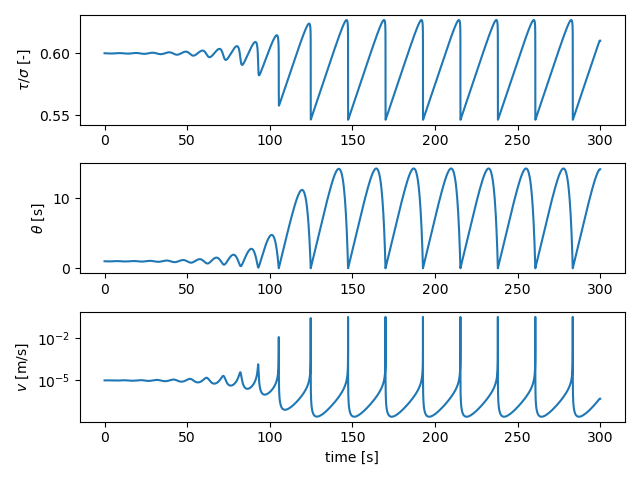

In [8]:
plt.figure()

# Normalised shear stress
plt.subplot(311)
plt.plot(p.ot[0]["t"], p.ot[0]["tau"] / set_dict["SIGMA"])
plt.ylabel(r"$\tau / \sigma$ [-]")

# State
plt.subplot(312)
plt.plot(p.ot[0]["t"], p.ot[0]["theta"])
plt.ylabel(r"$\theta$ [s]")

# Velocity
plt.subplot(313)
plt.plot(p.ot[0]["t"], p.ot[0]["v"])
plt.yscale("log")
plt.ylabel(r"$v$ [m/s]")
plt.xlabel("time [s]")

plt.tight_layout()
plt.show()